#NATURAL LANGUAGE PROCESSING

#Import Libraries



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the Dataset

In [5]:
dataset=pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t',quoting= 3)

#Cleaning the Text

In [6]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,1000):
  review=re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review=review.lower()
  review=review.split()
  ps = PorterStemmer()
  all_stopword = stopwords.words('english')
  all_stopword.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopword)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

# Creating the Bag of Words model

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [9]:
len(X[0])

1566

#Spliting the Dataset into Training set and Text set


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Navie Bayes Model

In [11]:
from sklearn.naive_bayes import GaussianNB
cl=GaussianNB()
cl.fit(X_train,y_train)

GaussianNB()

# Predicting the Test set

In [12]:
y_pred=cl.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

#Confusion Matrix for navie bayes


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[55 42]
 [12 91]]


0.73

#Making the Confusion Matrix using Tensor Flow

Epoch 1/10
20/20 [==============================] - 1s 10ms/step - loss: 0.6944 - accuracy: 0.5063 - val_loss: 0.6816 - val_accuracy: 0.6125
Epoch 2/10
20/20 [==============================] - 0s 6ms/step - loss: 0.6729 - accuracy: 0.6109 - val_loss: 0.6650 - val_accuracy: 0.7563
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.6397 - accuracy: 0.7375 - val_loss: 0.6319 - val_accuracy: 0.7937
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5810 - accuracy: 0.7922 - val_loss: 0.5705 - val_accuracy: 0.8250
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 0.4758 - accuracy: 0.8672 - val_loss: 0.4840 - val_accuracy: 0.8313
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3499 - accuracy: 0.9141 - val_loss: 0.4109 - val_accuracy: 0.8500
Epoch 7/10
20/20 [==============================] - 0s 6ms/step - loss: 0.2520 - accuracy: 0.9469 - val_loss: 0.3867 - val_accuracy: 0.8500
Epoch 8/10
20/20 [=

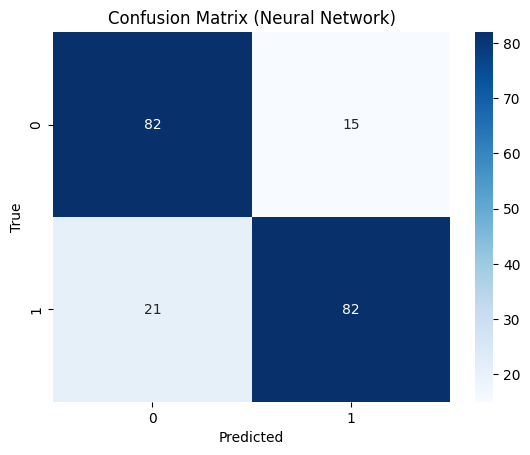

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred_nn = (model.predict(X_test) > 0.5).astype('int32')
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {accuracy_nn}")

cm_nn = confusion_matrix(y_test, y_pred_nn)

sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Neural Network)")
plt.show()
